In [1]:
import os 
import numpy as np
import pandas as pd
from scipy.io import loadmat
from osgeo import gdal, ogr, osr
import rijksdriehoek as rdc

cwd = os.getcwd()
print(cwd) # current working directory

/home/luke/Documents/xplatform/github/rendez_vous _course/daat


In [2]:
# Path to files

#SPRINGTIDE, 2 day's after full moon (26/5/21) 
OSR1 = '/home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/'  

# midpoint in data
OSR2 = '/home/luke/Documents/CapAI/OSR_data/OSR_matfiles_01-06-2021/'

# NEAPTIDE, 2 day's after last quarter (03/6/21)
OSR3 = '/home/luke/Documents/CapAI/OSR_data/OSR_matfiles_05-06-2021'

totalFiles = 0
totalDir = 0

files = os.listdir(OSR1)
for f in files:
	print(f)

layer-interfaces
coordinates
waterlevel
v-velocity
u-velocity
nsctri_constants.mat


In [3]:
for base, dirs, files in os.walk(OSR1):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files:',totalFiles)
print('Total Number of directories:',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/
Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/layer-interfaces
Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/coordinates
Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/waterlevel
Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/v-velocity
Searching in :  /home/luke/Documents/CapAI/OSR_data/OSR_matfiles_28-05-2021/u-velocity
Total number of files: 4676
Total Number of directories: 5
Total: 4681


In [4]:
li = OSR1 + '/layer-interfaces'
co = OSR1 + '/coordinates'
wl = OSR1 + '/waterlevel'
uvel = OSR1 + '/u-velbocity'
vvel = OSR1 + '/v-velocity'
con = OSR1 + '/nsctri_constants.mat'

In [5]:
files = os.listdir(co)
for f in files:
    print(f)

nsctri_depth.mat
nsctri_xzeta.mat
nsctri_yzeta.mat


In [6]:
def fromRdToWgs(x, y):
    X0      = 155000.0
    Y0      = 463000.0
    phi0    = 52.156160556
    lam0    = 5.387638889
    Kp = [0,2,0,2,0,2,1,4,2,4,1]
    Kq = [1,0,2,1,3,2,0,0,3,1,1]
    Kpq = [3235.65389,-32.58297,-0.24750,-0.84978,-0.06550,-0.01709,-0.00738,0.00530,
           -0.00039,0.00033,-0.00012]
    Lp = [1,1,1,3,1,3,0,3,1,0,2,5]
    Lq = [0,1,2,0,3,1,1,2,4,2,0,0]
    Lpq = [5260.52916, 105.94684, 2.45656, -0.81885,
           0.05594, -0.05607, 0.01199, -0.00256,
           0.00128, 0.00022, -0.00022, 0.00026]
   
    x = np.subtract(x, X0) * 0.00001
    y = np.subtract(y, Y0) * 0.00001
    phi = np.zeros_like(x)
    lam = np.zeros_like(y)
    for k in range(len(Kpq)):
        phi = phi + np.multiply(Kpq[k], np.multiply(np.power(x, Kp[k]), np.power(y, Kq[k])))
    phi = phi0 + np.divide(phi, 3600)
    for l in range(len(Lpq)):
        lam = lam + np.multiply(Lpq[l], np.multiply(np.power(x, Lp[l]), np.power(y, Lq[l])))
    lam = lam0 + np.divide(lam, 3600)
    return(phi, lam)

xzeta:
[1.e+08]
yzeta:
(array([   0,    0,    0, ..., 1846, 1846, 1846]), array([  0,   1,   2, ..., 644, 645, 646]))


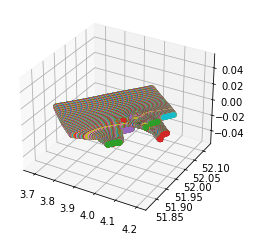

In [7]:
import matplotlib.pyplot as plt

xzeta = loadmat( co + '/nsctri_xzeta.mat')
print('xzeta:')
xzeta_np = np.asarray(xzeta['nsctri_xzeta'])
print(np.unique(xzeta_np[:,0]))


yzeta = loadmat( co + '/nsctri_yzeta.mat')
print('yzeta:')
yzeta_np = np.asarray(yzeta['nsctri_yzeta'])
# print(yzeta_np.shape)


depth = loadmat( co + ('/nsctri_depth.mat'))
# print('depth:')
depth_np = np.asarray(depth['nsctri_depth'])
# print(depth_np.shape)


yzeta = loadmat( co + '/nsctri_yzeta.mat')
# print('yzeta:')
# print(yzeta)

depth = loadmat( co + '/nsctri_depth.mat')
# print('depth:')
# print(depth)

# print(f"unique {np.unique(xzeta_np)}")
# for i in np.unique(xzeta_np):
# print(xzeta_np[7][2:-2])
    
# xzeta_np.tofile('xzeta_np.csv', sep = ',')

# print(xzeta_np[143][2:-2])
# for i in range(2, 143):
#     plt.plot(xzeta_np[i][2:-2], yzeta_np[i][2:-2])

mask = np.where(xzeta_np == 100000000)
print(mask)
xzeta_np[mask] = np.nan


latzeta, lonzeta = fromRdToWgs(xzeta_np, yzeta_np)
    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#print(latzeta[143][2:-2])
for i in range(3,lonzeta.shape[1]):
    ax.scatter(lonzeta[i][2:-2],latzeta[i][2:-2])

In [16]:
df = pd.DataFrame()
xzeta = loadmat( co + '/nsctri_xzeta.mat')
yzeta = loadmat( co + '/nsctri_yzeta.mat')
depth = loadmat( co + '/nsctri_depth.mat')

np_xzeta = np.asarray(xzeta) # numpy.ndarray 
np_yzeta = np.asarray(yzeta)
np_depth = np.asarray(depth)

#df['xzeta'] = xzeta.tolist()
#df['yzeta'] = yzeta.tolist()
#df['depth'] = depth.tolist()


# df.x = np_xzeta.to_list()
# df.y = np_yzeta.to_list()
# df.depth = np_depth.to_list()

#asp = np.concatenate((np_xzeta, np_yzeta, np_depth), axis = 1)
np_depth.shape

()

In [17]:
# src: https://stackoverflow.com/questions/43561622/merge-two-numpy-arrays
import numpy as np

first = np.array([[650001.88, 300442.2,   18.73,  0.575,  
                   650002.094, 300441.668, 18.775],
                  [650001.96, 300443.4,   18.7,   0.65,   
                   650002.571, 300443.182, 18.745],
                  [650002.95, 300442.54,  18.82,  0.473,  
                   650003.056, 300442.085, 18.745]])

second = np.array([[1],
                   [2],
                   [3]])

np.concatenate((first, second), axis=1)

array([[6.50001880e+05, 3.00442200e+05, 1.87300000e+01, 5.75000000e-01,
        6.50002094e+05, 3.00441668e+05, 1.87750000e+01, 1.00000000e+00],
       [6.50001960e+05, 3.00443400e+05, 1.87000000e+01, 6.50000000e-01,
        6.50002571e+05, 3.00443182e+05, 1.87450000e+01, 2.00000000e+00],
       [6.50002950e+05, 3.00442540e+05, 1.88200000e+01, 4.73000000e-01,
        6.50003056e+05, 3.00442085e+05, 1.87450000e+01, 3.00000000e+00]])

In [12]:
yzeta_np = np.asarray(yzeta['nsctri_yzeta'])
yzeta_np

array([[1.0000000e+08, 1.0000000e+08, 1.0000000e+08, ..., 1.0000000e+08,
        1.0000000e+08, 1.0000000e+08],
       [1.0000000e+08, 1.0000000e+08, 1.0000000e+08, ..., 1.0000000e+08,
        1.0000000e+08, 1.0000000e+08],
       [1.0000000e+08, 1.0000000e+08, 4.6003656e+05, ..., 4.3785319e+05,
        1.0000000e+08, 1.0000000e+08],
       ...,
       [1.0000000e+08, 1.0000000e+08, 1.0000000e+08, ..., 1.0000000e+08,
        1.0000000e+08, 1.0000000e+08],
       [1.0000000e+08, 1.0000000e+08, 1.0000000e+08, ..., 1.0000000e+08,
        1.0000000e+08, 1.0000000e+08],
       [1.0000000e+08, 1.0000000e+08, 1.0000000e+08, ..., 1.0000000e+08,
        1.0000000e+08, 1.0000000e+08]], dtype=float32)

[66834.64  66785.125 66736.18  66687.62  66639.01  66590.78  66542.94
 66495.04  66447.5   66400.34  66353.16  66306.31  66259.83  66213.3
 66167.125 66121.33  66075.49  66029.98  65984.8   65939.586 65894.72
 65850.18  65805.625 65761.414 65717.555 65673.7   65630.18  65586.97
 65543.74  65500.832 65458.227 65415.617 65373.28  65331.24  65289.227
 65247.53  65206.14  65164.746 65123.625 65082.78  65041.953 65001.37
 64961.047 64920.75  64880.688 64840.824 64800.953 64761.324 64721.91
 64682.5   64643.297 64604.312 64565.332 64526.53  64487.906 64449.27
 64410.805 64372.53  64334.25  64296.164 64258.242 64220.242 64182.39
 64144.684 64106.855 64069.188 64031.72  63994.14  63956.734 63919.5
 63882.164 63845.055 63808.168 63771.168 63734.383 63697.836 63661.195
 63624.812 63588.69  63552.49  63516.547 63480.88  63445.125 63409.688
 63374.58  63339.402 63304.637 63270.316 63235.957 63202.508 63170.047
 63137.66  63105.867 63074.633 63043.453 63012.777 62982.613 62952.523
 62923.043 62894.

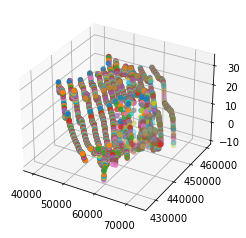

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print(xzeta_np[143][2:-2])
for i in range(3,xzeta_np.shape[1]):
    ax.scatter(xzeta_np[i][2:-2:50], yzeta_np[i][2:-2:50], depth_np[i][2:-2:50])

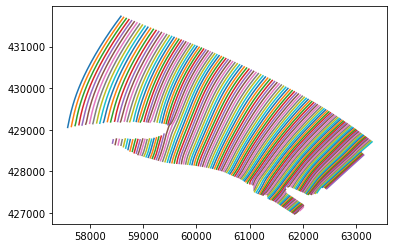

In [40]:
plt.plot()
for  i in range(250,647):
    grid = np.arange(len(xzeta_np[:, i]))
    plt.plot(xzeta_np[i][500:] , yzeta_np[i][500:] )

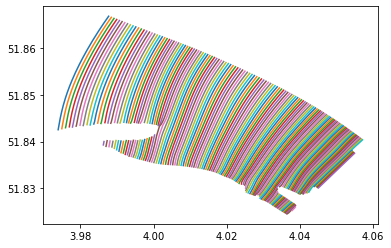

In [44]:
plt.plot()
for  i in range(250,647):
    grid = np.arange(len(xzeta_np[:, i]))
    plt.plot(lonzeta[i][500:] , latzeta[i][500:])